In [1]:
import cv2
import numpy as np
import random 
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline 
from skimage import transform, filters
import numpy as np
from skimage import io, color, util
from skimage.feature import greycomatrix
from sklearn import svm, ensemble, tree, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import h5py

h5filepath = r"C:\Users\user\OneDrive - mmu.edu.my\Documents\University\MMU\Class\Computer_Vision_CV2\Project1\Project\data.h5"

# read the dataset from h5 file and save into variables
file = h5py.File(h5filepath, 'r')
X = np.array(file['/data']).astype('uint8')
y = np.array(file['/label']).astype('uint8')

class_name = ['Grade_AA','Grade_B', 'Grade_D']
# # reshape the data
# X = X.reshape(len(X), -1)
# y = Y.reshape(-1)

print(X.shape)
print(y.shape)

(540, 1000, 1000)
(540,)


In [3]:
X_resized = []

for i in X:
    resized = cv2.resize(i, dsize=(360, 360))
    X_resized.append(resized)

print(X_resized)

[array([[14, 16, 14, ..., 16, 16, 12],
       [10, 14, 16, ..., 17, 17, 17],
       [15, 14, 12, ..., 15, 18, 18],
       ...,
       [18, 20, 18, ..., 13, 19, 17],
       [22, 18, 19, ..., 14, 19, 18],
       [20, 19, 18, ..., 14, 16, 16]], dtype=uint8), array([[ 7,  9,  8, ...,  9,  9,  9],
       [ 7,  7,  6, ..., 10,  9,  9],
       [ 6,  6,  6, ...,  9,  9,  8],
       ...,
       [ 4,  6,  7, ...,  8,  9,  7],
       [ 6, 11,  8, ...,  6,  7,  6],
       [ 8,  7, 12, ...,  6,  6,  9]], dtype=uint8), array([[ 5,  5,  5, ...,  3,  3,  4],
       [ 6,  5,  6, ...,  4,  4,  3],
       [ 6,  6,  6, ...,  4,  4,  3],
       ...,
       [ 6,  8, 12, ...,  9,  8,  9],
       [11,  6,  7, ..., 10, 11, 11],
       [12, 15, 15, ..., 12, 13, 12]], dtype=uint8), array([[ 6,  6,  6, ..., 14, 11, 15],
       [ 7,  5,  6, ..., 12, 12, 13],
       [ 6,  5,  7, ..., 13, 14, 11],
       ...,
       [ 4,  8, 10, ...,  6,  6,  7],
       [ 5,  5,  5, ...,  6,  6,  7],
       [ 7,  6,  6, ...,  6,  7,

In [4]:
print(X_resized[2].shape)

(360, 360)


1


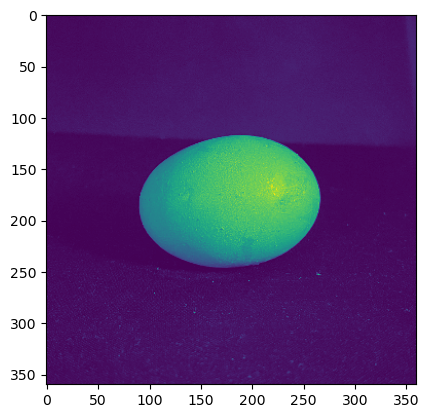

In [5]:
X = X_resized

print(y[3])
plt.imshow(X[3])

In [6]:
from sklearn.model_selection import KFold

X = np.array(X)
y = np.array(y)

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Use the KFold object to generate the training and testing sets
for train_index, test_index in kf.split(X):
    X_train_ori, X_test_ori = X[train_index], X[test_index]
    y_train_ori, y_test_ori = y[train_index], y[test_index]
    # Now you can create and evaluate your models using these training and testing sets

In [7]:
print(X_train_ori.shape)
print(y_train_ori.shape)
print(X_test_ori.shape)
print(y_test_ori.shape)

(486, 360, 360)
(486,)
(54, 360, 360)
(54,)


In [8]:
# reshape the data
X_train = X_train_ori.reshape(len(X_train_ori), -1)
y_train = y_train_ori.reshape(-1)
X_test = X_test_ori.reshape(len(X_test_ori), -1)
y_test = y_test_ori.reshape(-1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(486, 129600)
(486,)
(54, 129600)
(54,)


In [9]:
# SVM
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 100.00%


In [10]:
# Random Forest
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 98.15%


In [11]:
# Decision Tree
dt_classifier = tree.DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

Decision Tree Accuracy: 92.59%


In [12]:
# Naive Bayes
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

Naive Bayes Accuracy: 70.37%
